# Pipeline for Adding `+` Operator to Model Dataset

## Preproccessing Pipeline and Display

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math


# Consider adding noise removal: https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python 
# @TODO Create pipeline for only contouring a single image at a time and multiple
#
# @brief Searches for contours inside image, the last contuor detected is returned.
# @returns The pipeline returns the original digit with bounding box placed around it and also the contoured image.
def preprocess_pipeline(img):

  # Create Grayscale Copy and apply contours
  grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  bounded_img = None
  processed_digit = None

  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Save copy of bounded image
    bounded_img = img
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape

    padded_digit = digit.copy() # WHY THIS HERE

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Update image argument with processed form
    processed_digit = padded_digit

  return bounded_img, processed_digit


# @TODO Consider new printing format since errors occur for certain
#         lengths and images display too large.
def display_list_of_images(images_list):
  columns = 4

  # if less than 10 images doesn't seem to print correctly
  rows = math.ceil( len(images_list) / columns)

  fig = plt.figure(figsize=(13,13))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')

  plt.show()



# Save list of images to a specific folder
# DOUBLE CHECK THIS METHOD BEFORE RUNNING AGAIN
# maybe do read, rotate save images
def read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
  image_file_names = os.listdir(images_folder)

  # Create string of rotation to add to file name
  rotatation_str = ""
  if (rotation == 0):
    rotatation_str = "_c90"
  elif (rotation == 1):
      rotatation_str = "_c180"
  elif (rotation == 2):
      rotatation_str = "_c270"

  # Store 'num_digits_return' to return
  rotated_digits = []

  for i in range(0,len(image_file_names) - 1):
    image = cv2.imread(images_folder+ image_file_names[i])

    # 'rotation' expected is a cv2 rotation which is an int 0-2
    # 0 is clockwise 90 degrees, 1 is 180, 2 is 90 counter clockwise
    rotated_img = cv2.rotate(image, rotation)

    if ( i < num_digits_return):
      rotated_digits.append(rotated_img)

    # Save image as its name plus how its rotated:
    # Remove file type from img name
    image_name = os.path.splitext(image_file_names[i])

    cv2.imwrite(save_path + image_name[0] + rotatation_str +".png", rotated_img)

  if (num_digits_return !=0 ):
    return rotated_digits


## Processing Kaggle Dataset 567 Images of Hand Written `+` Wymbols
- [Datatset Link](https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols),
"dataset/add" is directory being added to model dataset.

In [ ]:
# GLOBALS #
ORIGINAL_IMGS_PATH = "./kaggle_dataset/add/"
IMGS_SAVE_PATH = "./kaggle_dataset/add_preproc/"
NUM_DIGITS_DISPLAY = 2

# Create folder to store rotated images:
try: 
  os.mkdir(IMGS_SAVE_PATH)
except:
  pass


# Get list of all file names of images in kaggle_dataset/add
image_names = os.listdir(ORIGINAL_IMGS_PATH)
print(len(image_names))

# Perform preprocessing on images from ORIGINAL_IMG_PATH
preproc_digits = []
for i in range(0,len(image_names)):
  image = cv2.imread(ORIGINAL_IMGS_PATH + image_names[i])

  # Create a image bounded from contour, then preprocess into (28, 28) image
  bounded_img, preproc_img = preprocess_pipeline(image)

  if (i < NUM_DIGITS_DISPLAY):
    preproc_digits.append(bounded_img)
    preproc_digits.append(preproc_img)

  # Save preproc image to new folder
  # save_img_to_add_preproc_dir(image_names[i],  preproc_img)
  cv2.imwrite(IMGS_SAVE_PATH + image_names[i], preproc_img)


# DISPLAYING IMAGES TO SEE OPERATION maybe display first 2?
print(f"DISPLAYING FIRST {NUM_DIGITS_DISPLAY} DIGITS")
display_list_of_images(preproc_digits)

### Create Duplicated Rotations of Preprocessed Images and Create Folder to Save Them

In [ ]:
import os
import cv2
import math
import os
import numpy as np
import matplotlib.pyplot as plt

# ASLJDKFKSJDFKLJASDLKFSAD;LFKJASLKJDFSJDF

# A@@@@@@@@@@@@ ADD GIT IGNORE TO DATASETS


####SKDJFLKDJ AFKLSJD FKLAJ SDLKJFK;ASDF

## GLOBALS
## Create globals for save paths
# INSURE NEW DIRECTORY IS WHATS USED FOR SAVE PATH
ROTATED_IMAGES_SAVE_PATH = "./full_+_preprocessed/"
PREPROCESSED_IMAGES_PATH = "./kaggle_dataset/add_preproc/"
NUM_DIGITS_DISPLAY = 2

# Create folder to store rotated images:
try: 
  os.mkdir(ROTATED_IMAGES_SAVE_PATH)
except:
  pass

# Create duplicate rotations of a folder and save rotated images
rotation_list = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]
rotation_names = ["ROTATE_90_CLOCKWISE", "ROTATE_180", "ROTATE_90_COUNTERCLOCKWISE"]

for rotation in rotation_list:
  # read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
  saved_images = read_rotate_save_images(PREPROCESSED_IMAGES_PATH,
    ROTATED_IMAGES_SAVE_PATH, rotation, NUM_DIGITS_DISPLAY)

  # Display 20 saved images
  print(f"DISPLAYING FIRST {rotation_names[rotation]} DIGITS")
  display_list_of_images(saved_images)


# Copy the original preprocessed digits into the newly created folder:
image_names = os.listdir(PREPROCESSED_IMAGES_PATH)

for i in range(0,len(image_names)):
  image = cv2.imread(PREPROCESSED_IMAGES_PATH + image_names[i])

  cv2.imwrite(ROTATED_IMAGES_SAVE_PATH + image_names[i], image)

## Second Processing Kaggle Dataset,5XX Images of Hand Written `+` Wymbols
- [Datatset Link](https://www.kaggle.com/datasets/michelheusser/handwritten-digits-and-operators),
"All Data/+" is directory being added to model dataset.

In [ ]:
import re
import math
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math


# GLOBALS #
ORIGINAL_IMGS_PATH = "./kaggle_dataset2/+/"
IMGS_SAVE_PATH = "./kaggle_dataset2/+_preproc/"
NUM_DIGITS_DISPLAY = 2

# Try to create a folder to store preprocessed images:
try: 
  os.mkdir(IMGS_SAVE_PATH)
except:
  pass


image_names = os.listdir(ORIGINAL_IMGS_PATH)

# Only the unprocessed images are going to be used from
# this dataset, these images are determined using this regex
regex_pattern = "[+][_][\d][_][\d]+.png"
original_digits_names = []

for file in image_names:
  match = re.search(regex_pattern, file)

  if match:
    original_digits_names.append(file)


preproc_digits = []
for i in range(0,len(original_digits_names)):
  image = cv2.imread(ORIGINAL_IMGS_PATH + original_digits_names[i])

  # Creates copy of image then preprocesses copy
  bounded_img, preproc_img = preprocess_pipeline(image)

  if (i < NUM_DIGITS_DISPLAY):
    preproc_digits.append(bounded_img)
    preproc_digits.append(preproc_img)

  # Save preproc image to new folder
  cv2.imwrite(IMGS_SAVE_PATH + original_digits_names[i], preproc_img)


# DISPLAYING IMAGES TO SEE OPERATION maybe display first 8?
print(f"DISPLAYING FIRST {NUM_DIGITS_DISPLAY} DIGITS")
display_list_of_images(preproc_digits)

### Create Duplicated Rotations of Preprocessed Images and Create Folder to Save Them

In [ ]:
import os
import cv2
import math
import os
import numpy as np
import matplotlib.pyplot as plt



## GLOBALS
## Create globals for save paths
# INSURE NEW DIRECTORY IS WHATS USED FOR SAVE PATH
ROTATED_IMAGES_SAVE_PATH = "./full_+_preprocessed/"
PREPROCESSED_IMAGES_PATH = "./kaggle_dataset2/+_preproc/"
NUM_DIGITS_DISPLAY = 2

# Create folder to store rotated images:
try: 
  os.mkdir(ROTATED_IMAGES_SAVE_PATH)
except:
  pass

# Create duplicate rotations of a folder and save rotated images
rotation_list = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]
rotation_names = ["ROTATE_90_CLOCKWISE", "ROTATE_180", "ROTATE_90_COUNTERCLOCKWISE"]

for rotation in rotation_list:
  # read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
  saved_images = read_rotate_save_images(PREPROCESSED_IMAGES_PATH,
    ROTATED_IMAGES_SAVE_PATH, rotation, NUM_DIGITS_DISPLAY)

  # Display 20 saved images
  print(f"DISPLAYING FIRST {rotation_names[rotation]} DIGITS")
  display_list_of_images(saved_images)


# Copy the original preprocessed digits into the newly created folder:
image_names = os.listdir(PREPROCESSED_IMAGES_PATH)

for i in range(0,len(image_names)):
  image = cv2.imread(PREPROCESSED_IMAGES_PATH + image_names[i])

  cv2.imwrite(ROTATED_IMAGES_SAVE_PATH + image_names[i], image)


### Create labels for all new images

### Con

<class 'numpy.ndarray'>
train_full len:  60000
images_train shape:  (3873, 28, 28)
mnist train shape:  (55000, 28, 28)
new len 58873
img index 7.0


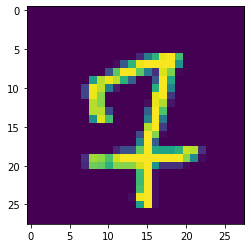

img index 5.0


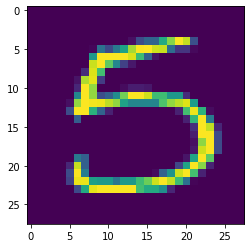

img index 1.0


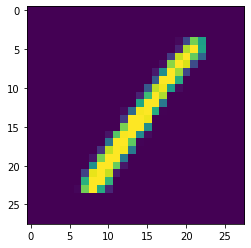

img index 1.0


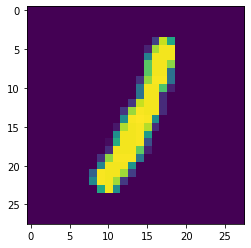

img index 5.0


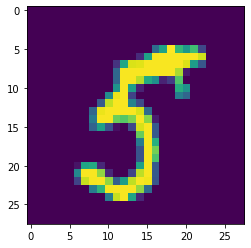

img index 8.0


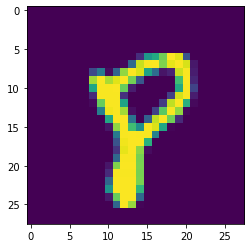

img index 8.0


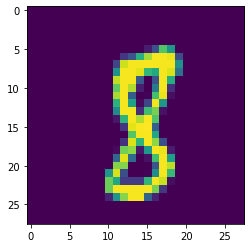

img index 8.0


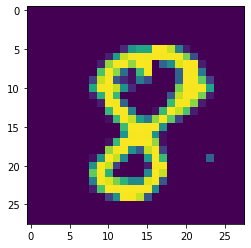

img index 5.0


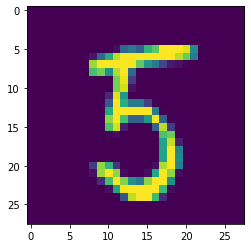

img index 5.0


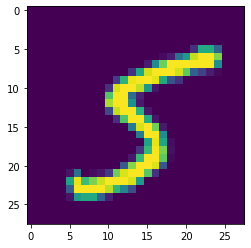

train len:  58873
vali len:  5604
test len:  10353


In [7]:
from tensorflow import keras
import cv2
import os
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt


def load_add_operator_dataset():

  images_names = os.listdir("./full_+_preprocessed/")
  add_images = []
  for img_name in images_names:
    image = cv2.imread('./full_+_preprocessed/'+ img_name, 0)

    add_images.append(image)

  # Convert image to numpy array to match MNIST datatype
  images = np.asarray(add_images)

  # Load labels
  image_labels = create_add_operator_labels()

  # Convert labels to numpy array to match MNIST datatype
  image_labels = np.asanyarray(image_labels)

  # Remove 14% for test
  # X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
  labels_frac = math.ceil(len(image_labels) * (1/7)) # >>> 604
  images_test, images_train = images[:labels_frac] / 255., images[labels_frac:] / 255. 
  labels_test, labels_train = image_labels[:labels_frac] / 255., image_labels[labels_frac:] / 255. 

  # Take another 8% for validation set, remainder stays in train
  labels_frac = math.ceil(len(image_labels) * (.5/6)) # >>> 353
  images_valid, images_train = images[:labels_frac] / 255., images[labels_frac:] / 255. 
  labels_valid, labels_train = image_labels[:labels_frac] / 255., image_labels[labels_frac:] / 255. 


  print("images_train shape: ", images_train.shape)
  # print("train imgs", len(images_train))
  # print("test imgs", len(images_test))
  # print("val imgs", len(images_valid))

  return images_train, images_valid, images_test, labels_train, labels_valid, labels_test


# Create float labels for every item in directory
def create_add_operator_labels():
  preprocessed_image_names = os.listdir("./full_+_preprocessed/")
  add_labels = (10 / 255.0)
  y_add_labels = [add_labels for img in range(len(preprocessed_image_names))]

  return y_add_labels

# @brief Generate data subsets for neural net model.
def create_mnist_train_test():
  # number of images, 28x28 pixels
  # Shape: X:(60000, 28, 28), Y:(10000, 28, 28)
  (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

  print(type(X_train_full))
  print("train_full len: ", len(X_train_full))

  # Create validation set and convert to float in 0-1 range
  X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
  y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
  X_test = X_test / 255.

  # Append 
  # add_labels = create_add_operator_labels()
  # can probably break this up to images then labels
  add_train, add_valid, add_test, y_add_train, y_add_valid, y_add_test = load_add_operator_dataset()

  print("mnist train shape: ", X_train.shape)

  # Add add images to MNIST 
  X_train_new = np.concatenate((X_train, add_train))
  X_test_new = np.concatenate((X_test, add_valid))
  X_valid_new = np.concatenate((X_valid, add_test))
  del add_train, add_valid, add_test

  y_train_new = np.concatenate((y_train, y_add_train))
  y_test_new = np.concatenate((y_valid, y_add_valid))
  y_valid_new = np.concatenate((y_test, y_add_test))
  del y_add_train, y_add_valid, y_add_test


  #@ TODO consider deleting old variables using the "del" command
  print("new len", len(y_train_new))

  # Find shuffling algorithm to rearrange the add images and labels
  idx = np.random.permutation(len(y_train_new))
  X_train_new_sh, y_train_new_sh = X_train_new[idx], y_train_new[idx]

  idx = np.random.permutation(len(y_valid_new))
  X_valid_new_sh, y_valid_new_sh = X_valid_new[idx], y_valid_new[idx]

  idx = np.random.permutation(len(y_test_new))
  X_test_new_sh, y_test_new_sh = X_test_new[idx], y_test_new[idx]

  # i = 0
  # while (i < 10):
  #   print("img index", y_train_new_sh[55000 + i])
  #   plt.imshow(X_train_new_sh[55000 + i])
  #   plt.show()
  #   i += 1


  return  X_train_new_sh, X_valid_new_sh, X_test_new_sh, y_train_new_sh, y_valid_new_sh, y_test_new_sh

 # return X_train_new,  X_valid_new, X_test_new, y_train_new, y_valid_new, y_test_new

# def mnist_labels_to_strs():

#   preprocessed_image_names = os.listdir("./full_+_preprocessed/")
#   add_labels = (10 / 255.0)
#   y_add_labels = [add_labels for img in range(len(preprocessed_image_names))]

#   # Convering mnist dataset from numpy.uint8 to string
#   y_train_str = y_train_full.astype(str)

#   return   

X_train,  X_valid, X_test, y_train, y_valid, y_test = create_mnist_train_test()

print("train len: ", len(X_train))
print("vali len: ", len(X_valid))
print("test len: ", len(X_test))



### MAIN ###
# (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# '0' parameter loads the color scale with image
# Converts it to the shape of mnist (28, 28, 3) -> (28, 28)
# image = cv2.imread("./full_+_preprocessed/+_1_0.png", 0)


# print(image.shape)

# print(X_train_full[0].shape)



In [ ]:
print(type(X_train))

In [ ]:

# Add new operator images to dataset
def add_images_to_dataset():

  return

# print("new label = ", y_add_labels[:8])
# print(len(y_add_labels))
# print(len(preprocessed_image_names))


# #Before converting
# print("import mnist: ", y_train_full)

# # Convering mnist dataset from numpy.uint8 to string
# y_train_str = y_train_full.astype(str)

# print("mnist converted to string: ", y_train_str)

# print(y_train_str)



## Testing on Real World Images

In [ ]:
# @TODO Make a prediction method that returns an enum of the its prediction